In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',78)


In [2]:
df = pd.read_csv('cereal.csv')

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df.shape

(77, 16)

In [6]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()}')

name: 77
mfr: 7
type: 2
calories: 11
protein: 6
fat: 5
sodium: 27
fiber: 13
carbo: 22
sugars: 17
potass: 36
vitamins: 3
shelf: 3
weight: 7
cups: 12
rating: 77


In [7]:
df.isnull().sum()

# Wow the data is very clean, there's no null data

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [10]:
# dilabel name kita bisa skip tetapi tak usah dihilangkan karena akan berpengaruh di akhir step

In [47]:
# kita akan membuat tabel filter, yang memfilter rating diatas mean dan rating dibawah mean

mean = df['rating'].mean()

def comment(value):
    if value > mean:
        return 'Good'
    else:
        return 'Bad'

df = df.assign(result=df['rating'].apply(comment))

In [80]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,result
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Good
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bad
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Good
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Good
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Bad


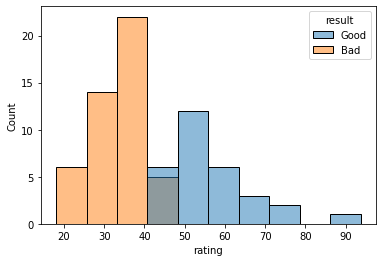

In [76]:
sns.histplot(data=df,
             x='rating',
             hue='result',
             bins=10)

plt.show()

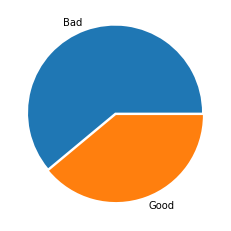

In [100]:
plt.pie(x=df['result'].value_counts(),
        labels=['Bad','Good'],
        explode=[0.03,0],
        )

plt.show()

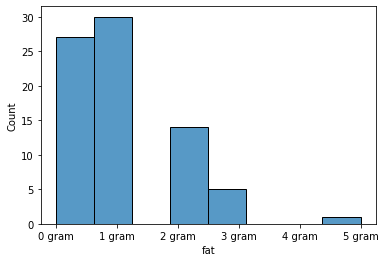

In [112]:
# Fat
sns.histplot(data=df,x='fat')

x = [0,1,2,3,4,5]
label_gram = ['0 gram','1 gram','2 gram','3 gram','4 gram','5 gram']

plt.xticks(x,label_gram)
plt.show()

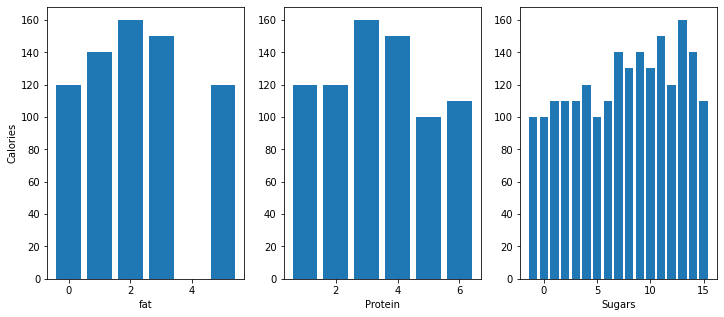

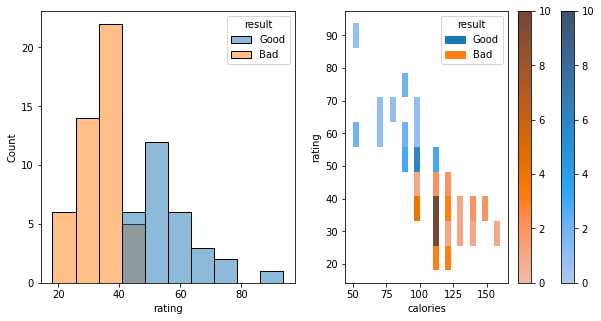

In [159]:
plt.figure(figsize=(12,5))

# Calories with Fat
plt.subplot(131)
plt.bar(data=df,x='fat',height='calories')
plt.xlabel('fat')
plt.ylabel('Calories')

# Calories with Protein
plt.subplot(132)
plt.bar(data=df,x='protein',height='calories')
plt.xlabel('Protein')

# Calories with Sugars
plt.subplot(133)
plt.bar(data=df,x='sugars',height='calories')
plt.xlabel('Sugars')

# Range Rating with the category Good or Bad
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df,
             x='rating',
             hue='result',
             bins=10)

# Calories with Rating
plt.subplot(122)
sns.histplot(data=df,x='calories',y='rating',hue='result',cbar=True)

plt.show()

In [ ]:
# if we look at table 5
# as we can see the middle point at range 40 - 50, that's the mean of the rating so the smaller calories the result will Good 
# meanwhile the greater calories the result will Bad
# but othercase if we look at the first till the third graph the calories effected by
# other thing too, that's why im just looking for the last graph
# for making a conlclusion